In [30]:
import pandas as pd

#csvs
netflix = pd.read_csv("netflix_titles.csv")
amazon = pd.read_csv("amazon_prime_titles.csv")
hulu = pd.read_csv("hulu_titles.csv")
disney = pd.read_csv("disney_plus_titles.csv")


print(netflix.shape)
print(netflix.columns)
print(netflix.head(3))

print(amazon.shape)
print(amazon.columns)
print(amazon.head(3))

print(hulu.shape)
print(hulu.columns)
print(hulu.head(3))

print(disney.shape)
print(disney.columns)
print(disney.head(3))



(8807, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
  show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  

In [31]:
netflix = netflix.rename(columns={
    "title": "title",
    "type": "type",
    "listed_in": "genre",
    "release_year": "release_year",
    "rating": "rating",
    "description": "description",
    "cast": "cast"
})
netflix["platform"] = "Netflix"

hulu = hulu.rename(columns={
    "title": "title",
    "type": "type",
    "listed_in": "genre",
    "release_year": "release_year",
    "rating": "rating",
    "description": "description",
    "cast": "cast"
})
hulu["platform"] = "Hulu"

amazon = amazon.rename(columns={
    "title": "title",
    "type": "type",
    "listed_in": "genre",
    "release_year": "release_year",
    "rating": "rating",
    "description": "description",
    "cast": "cast"
})
amazon["platform"] = "Amazon"

disney = disney.rename(columns={
    "title": "title",
    "type": "type",
    "listed_in": "genre",
    "release_year": "release_year",
    "rating": "rating",
    "description": "description",
    "cast": "cast"
})
disney["platform"] = "Disney"

In [32]:
#required columns
columns_needed = ["title", "type", "release_year", "rating", "genre", "platform", "description", "cast"]
netflix = netflix[columns_needed]
amazon = amazon[columns_needed]
hulu = hulu[columns_needed]
disney = disney[columns_needed]

#combine
combined = pd.concat([netflix, amazon, hulu, disney], ignore_index=True)
print(combined.shape)
combined.head()
combined.to_csv("all_ott_shows.csv", index=False)


(22998, 8)


In [33]:
import pandas as pd

df = pd.read_csv("all_ott_shows.csv")

df.dropna(subset=["title"], inplace=True)

df["genre"].fillna("Unknown", inplace=True)
df["release_year"].fillna("0000", inplace=True)
df["type"].fillna("Unknown", inplace=True)
df["rating"].fillna("Unknown", inplace=True)

df.reset_index(drop=True, inplace=True)
df.to_csv("all_ott_cleaned.csv", index=False)



C:\Users\arnav\AppData\Local\Temp\ipykernel_25524\1668495429.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["genre"].fillna("Unknown", inplace=True)
C:\Users\arnav\AppData\Local\Temp\ipykernel_25524\1668495429.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

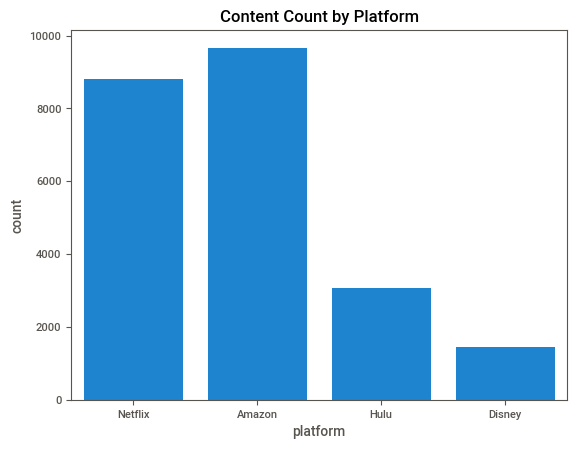

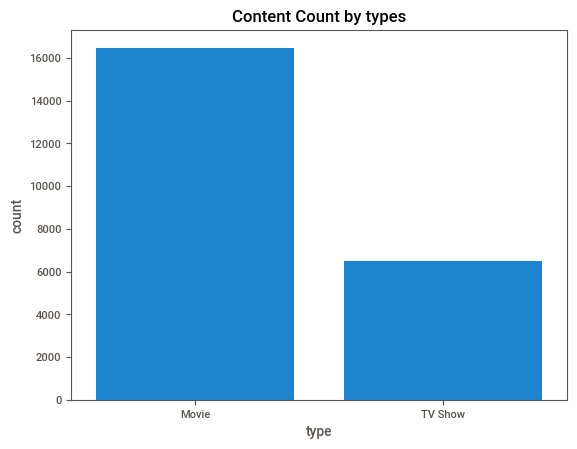

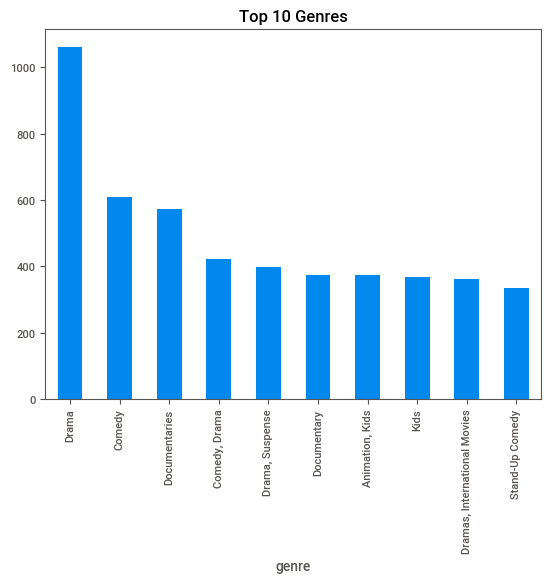

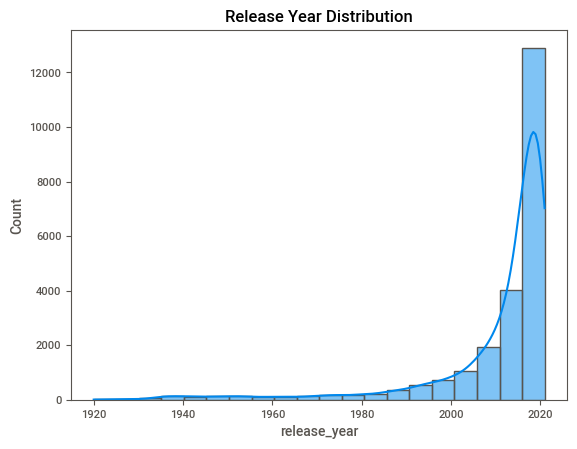

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of shows per platform
sns.countplot(data=df, x="platform")
plt.title("Content Count by Platform")
plt.show()

# type 
sns.countplot(data=df, x="type")
plt.title("Content Count by types")
plt.show()

# Genre bar chart
top_genres = df["genre"].value_counts().nlargest(10)
top_genres.plot(kind="bar", title="Top 10 Genres")
plt.show()

# Release year histogram
sns.histplot(df["release_year"], bins=20, kde=True)
plt.title("Release Year Distribution")
plt.show()


In [35]:
#to combine all
sentences = combined['genre'].tolist()
len(sentences)

22998

In [36]:
sentences_to_string = " ".join(sentences)
sentences_to_string

"Documentaries International TV Shows, TV Dramas, TV Mysteries Crime TV Shows, International TV Shows, TV Action & Adventure Docuseries, Reality TV International TV Shows, Romantic TV Shows, TV Comedies TV Dramas, TV Horror, TV Mysteries Children & Family Movies Dramas, Independent Movies, International Movies British TV Shows, Reality TV Comedies, Dramas Crime TV Shows, Docuseries, International TV Shows Crime TV Shows, International TV Shows, TV Action & Adventure Dramas, International Movies Children & Family Movies, Comedies British TV Shows, Crime TV Shows, Docuseries TV Comedies, TV Dramas Documentaries, International Movies Crime TV Shows, Spanish-Language TV Shows, TV Dramas Thrillers International TV Shows, Spanish-Language TV Shows, TV Action & Adventure Crime TV Shows, Docuseries, International TV Shows International TV Shows, TV Action & Adventure, TV Dramas Comedies, International Movies Children & Family Movies Comedies, International Movies, Romantic Movies Docuseries, I

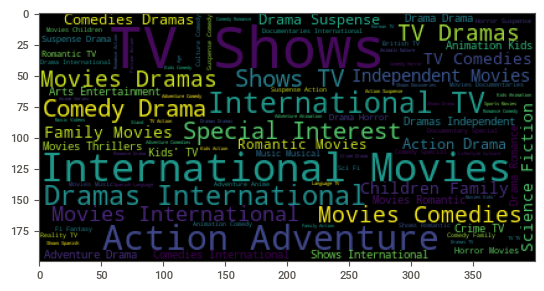

In [37]:
from wordcloud import WordCloud
# plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_to_string))